## Final Project Submission

Please fill out:
* Student name: Nicholas Njubi Mburu
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Samwel Jane/ Samwel G/ Everlyne/ Veronica Isiaho
* Blog post URL:


# Microsoft Movie Studio Proposal Project

## Author: Nicholas Njubi

## Overview

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I have been charged with exploring what  films are currently doing the best at the box office. I must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.


## Business Problem

 For this project I chose to major on the following business problems
 
 1) Whether their is a correlation between film runtime and average rating? Also what film runtime would I advise?
 This is because Microsoft what other industry experts are doing and how this would affect their ratings. I a film is
 too short the viewer might feel it was rushed while if it was too long they would not want to watch it.
 
 2) Which movie genres had the best average rating?
 Microsoft is still debating on which genre/ genre's to focus on. This analysis will allow us to know what the viewers like
 most so that we can tailor make it for the market.
 
 3) What are the top 10 highest grossing films?
 A big factor of business is profits. Microsoft Movie studios wants to understand which are the top 10 highest grossing films.
 Later on this report will be given to the marketing and research department who we will work together to do a much deeper analysis on each of the movies in the top 10 list.

## Data Understanding

For this analysis I had access to the data from the following websites which offer movie streaming and rating services

1) https://www.the-numbers.com/

2) https://www.themoviedb.org/

3) https://www.rottentomatoes.com/

4) https://www.imdb.com/

5) https://www.boxofficemojo.com/

I chose to work with the following data set

a) "title.basics.csv", because it had information on genres and movie titles

b) "title.ratings.csv", because it could be easily merged with "title.basics.csv" and had
information on average rating

c)"bom.movie_gross.csv", because it had information on domestic and foreign gross of films.



In [112]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [113]:
#Check the contents of file dsc-Phase-1-Project
! ls

CONTRIBUTING.md
LICENSE.md
README.md
awesome.gif
bom.movie_gross.csv
student.ipynb
title.basics.csv
title.ratings.csv
zippedData


### Title Basics

Load title.basics.csv as title_basics_df

In [114]:
title_basics_df = pd.read_csv("title.basics.csv")
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Get familiar with the data. This step includes:

1) Understanding the dimensionality of your dataset

2) Investigating what type of data it contains, and the data types used to store it

3) Discovering how missing values are encoded, and how many there are

4) Getting a feel for what information it does and doesn't contain

In [115]:
# Check how many rows and columns it has.
title_basics_df.shape

(146144, 6)

In [116]:
# Check the datatypes and for missing values.
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


"""
The data types seem to line up with what we expect. The columns
containing strings are type object, whereas the column containing decimal
numbers ( runtime_minutes) is type float64. Finally the column containing
numbers (start_year) is type int64

We can see that there are missing/NaN values in the original_title, runtime-minutes
and genres columns, since there are 146144 total rows and each of those
columns contains fewer than146144 non-null values

We also see that this data source contains NaN values. Specifically in the Skin Color
column there are "NAN" characters filled in some places. If we want
to use that information, we'll need to make a decision about what to
do with those "-" values.

### Title Ratings

Load title.ratings.csv as title_ratings_df

In [117]:
title_ratings_df = pd.read_csv("title.ratings.csv")
title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Get familiar with the data. This step includes:

1) Understanding the dimensionality of your dataset

2) Investigating what type of data it contains, and the data types used to store it

3) Discovering how missing values are encoded, and how many there are

4) Getting a feel for what information it does and doesn't contain

In [118]:
title_ratings_df.shape

(73856, 3)

In [119]:
title_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


"""
The data types seem to line up with what we expect. The column
containing strings ( tconst ) are type object, whereas the column containing decimal
numbers ( averagerating ) is type float64. Finally the column containing
numbers ( numvotes ) is type int64.

We can see that there are no missing/NaN values in the tconst, averagerating
and numvotes columns, since there are 73856 total rows and each of the
columns.

We also see that this data source contains no NaN values.

### Movie Gross

Load bom.movie_gross.csv as movie_gross_df

In [120]:
movie_gross_df = pd.read_csv("bom.movie_gross.csv")
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Get familiar with the data. This step includes:

1) Understanding the dimensionality of your dataset

2) Investigating what type of data it contains, and the data types used to store it

3) Discovering how missing values are encoded, and how many there are

4) Getting a feel for what information it does and doesn't contain

In [121]:
movie_gross_df.shape

(3387, 5)

In [122]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [123]:
#Check if there are any missing values in the dataframe
movie_gross_df.head(-1)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3381,Beauty and the Dogs,Osci.,8900.0,NaN,2018
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018


"""
Not all the  data types seem to line up with what we expect. The columns
containing strings ( title )and (studio) are type object, whereas the column containing decimal
numbers ( domestic_gross ) is type float64. Finally the column containing
numbers ( year ) is type int64. The issue is with the column containing decimal numbers (Foreign_gross)
which should be an float64 instead of an odject. 

We can see that there are missing/NaN values in the studio, domestic_gross and
foreign_gross columns, since there are 3387 total rows and each of those
columns contains fewer than 3387 non-null values

We also see that this data source contains NaN values. Specifically in the foreign_gross
column there are "NAN" characters filled in some places. If we want
to use that information, we'll need to make a decision about what to
do with those "-" values.

### 1) Relationship Between Average rating and runtime

## Data Preparation

1) I began with merging the title_ratings_df and title_basics_df in order to get a combined dataframe named total_combined_df.I used and inner join using the column 'tconst' which was common in both dataframes. I did this because averagrating only exists in title_ratings_df while runtime only exists in title_basics_df.

2) Next I did an analysis of the combined dataframe in order to get a better understanding of its contents.(df.head(), df.shape, df.info())

3) Next I looked for the mean of number of votes "numvotes". This was done because for me to work with the most accurate/helpful data on averagerating I needed data from average ratings that were from a large sample of votes. 

4) Next I created another dataframe "total_combined_abv_aver_df" that had only rows which had met the criteria of average & above average number of votes.

5) Next I did an analysis of the combined dataframe in order to get a better understanding of its contents.(df.head(), df.shape, df.info()). From the analysis I saw that there was no issue of missing Data or wrong data types.

6) Final created a scatter plot using the columns "averagerating" and "runtime_minutes". I did this because scatter plots are the best plots for revealing relationship between two variables. I also looked for average runtime in order to see whether their was an industry standard.

In [124]:
# Merge the title ratings dataframe to the title basics dataframe.
total_combined_df = title_ratings_df.merge (title_basics_df, how = 'inner', on = 'tconst')

In [125]:
total_combined_df.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [126]:
total_combined_df.shape

(73856, 8)

In [127]:
total_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


"""
The dataframe seems to align with what we had in our two previous dataframes. 
The columns are 8 and the number of rows are 73,856 which is in line with the
number of row in the total_ratings_df.

We can see that there are missing/NaN values in the runtime_minutes and genres
, since there are 73,856 total rows and each of those
columns contains fewer than 73,856 non-null values

In [128]:
# Find mean for number of votes
numvotes_mean = total_combined_df['numvotes'].mean()
print(numvotes_mean)

3523.6621669194105


In [129]:
# Create new dataframe where number of vote are above average
total_combined_abv_aver_df = total_combined_df[total_combined_df['numvotes'] >= 3523]
total_combined_abv_aver_df.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
10,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy
12,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama"
16,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport"
17,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance"


In [130]:
total_combined_abv_aver_df.shape

(4753, 8)

In [131]:
total_combined_abv_aver_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4753 entries, 3 to 73831
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           4753 non-null   object 
 1   averagerating    4753 non-null   float64
 2   numvotes         4753 non-null   int64  
 3   primary_title    4753 non-null   object 
 4   original_title   4753 non-null   object 
 5   start_year       4753 non-null   int64  
 6   runtime_minutes  4753 non-null   float64
 7   genres           4753 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 334.2+ KB


"""
The data aligns with our expectations, the rows have reduced to 4753 and we do not have any NAN/ Missing values
"

## Data Modelling

I choose to create a scatter plot because my goal was to see the correlation between runtime and averagerating. To do this I first had to create a new dataframe "total_combined_abv_aver_df" first. This is because I realized that some of the movies had very few number of votes, I felt the best step moving forward was to remove the rows whose number of votes were below average.

I also chose to find out the mean of runtime in the new dataframe because I saw a trend in the scatter plot that indicated most movies ranged betweewn a certain runtime.(Similar to industry standard)

The choices were appropriate because we only used average rating which had votes from large samples and the scatter plot gave the insights that we needed. This information is important to the business problem of What runtime should the studio's movies have.

108.22932884494004

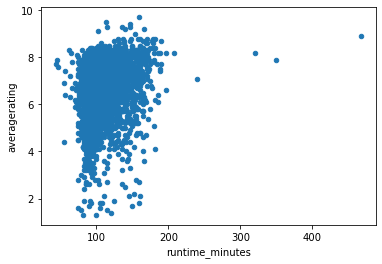

In [132]:
# Create a scatter plot
total_combined_abv_aver_df.plot('runtime_minutes', 'averagerating', kind='scatter');

# Find mean of runtime
runtime_minutes_mean = total_combined_abv_aver_df['runtime_minutes'].mean()
runtime_minutes_mean

## Data Evaluation

From the analysis, the conclusion is that there is no clear correlation between runtime and average rating. Looking at the scatter plot it is clear that most movies have a runtime of between 90minutes and 150 minutes. The average of the dataframe being 108.22 minutes.

From the analysis, we also saw 4 outliers who had runtimes of above 200minutes while at the same time having average ratings of above 6. My reccommendation would be to research on these outliers in future data analysis projects.

Overall, my business recommendation is

1) The studio should work with the industry average and avoid creating whose runtime go beyond 108.22 minutes.

### Genres of Movies with Highest Average Rating

## Data Preparation

1) I began with creating a new dataframe called Total_combined_high_rate_df. This dataframe contains the information of movies which had the highest rating that is >=9.

2) Next I did an analysis of the combined dataframe in order to get a better understanding of its contents.(df.head(), df.shape, df.info())

3) Final I created a pie chart to clearly visualize the data.

In [133]:
# Create new dataframe where average rating is equal to / above 9
total_combined_high_rate_df = total_combined_abv_aver_df[total_combined_abv_aver_df['averagerating'] >= 9]
total_combined_high_rate_df.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
4461,tt7738784,9.4,9629,Peranbu,Peranbu,2018,147.0,Drama
4504,tt8176054,9.0,4854,Pariyerum Perumal,Pariyerum Perumal,2018,154.0,Drama
9643,tt5813916,9.3,100568,The Mountain II,Dag II,2016,135.0,"Action,Drama,War"
10198,tt5354160,9.3,18470,Aynabaji,Aynabaji,2016,147.0,"Crime,Mystery,Thriller"
12007,tt5311546,9.2,4297,Natsamrat,Natsamrat,2016,166.0,"Drama,Family"


In [134]:
total_combined_high_rate_df.shape

(10, 8)

In [135]:
total_combined_high_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 4461 to 63149
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           10 non-null     object 
 1   averagerating    10 non-null     float64
 2   numvotes         10 non-null     int64  
 3   primary_title    10 non-null     object 
 4   original_title   10 non-null     object 
 5   start_year       10 non-null     int64  
 6   runtime_minutes  10 non-null     float64
 7   genres           10 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 720.0+ bytes


In [136]:
total_combined_high_rate_df['genres']

4461                      Drama
4504                      Drama
9643           Action,Drama,War
10198    Crime,Mystery,Thriller
12007              Drama,Family
12174             Drama,History
16066                     Drama
36889        Comedy,Documentary
49629                     Drama
63149              Comedy,Drama
Name: genres, dtype: object

## Data Modelling

I choose to create a pie chart for the genres because this gave the best representation for genres which had the highest rating.
This information is important to the business problem of Which movie genres are most highest rated by viewers.

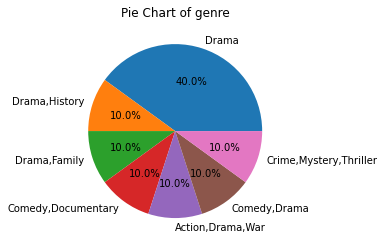

In [137]:
# Count the occurrences of each unique item
genre_counts = total_combined_high_rate_df['genres'].value_counts()

# Create a pie chart
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of genre')
plt.show()

## Data Evaluation

From the analysis, the conclusion is that the genre drama is the highest rated according to the 
data that we have.

My reccommenations;

1) The studio should focus on movies that are in the genre of drama only or have drama as one of their genres,
that is if their target is to get the highest rating of 9 and above. The other genre that is of interest is comedy.

### Top 5 Highest Grossing movies of all time

## Data Preparation

1) I started by getting an understanding of the dataframe using df.head() and df.info()

2) Then I converted foreign_gross from a string (Object) to a number(float)

3) Next I created a new column, through adding the domestic_gross and foreign_gross colums. This gave me th
total gross amounts.

4) Next I created a dataframe with the top 10 highest grossing movies.

5) Final created a bar graph of the top 10 highest grossing movies.

In [138]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [139]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


"""
Foreign_gross needs to be conveted from object to float"""

In [140]:
#Convert foreign gross from being an object to a float
movie_gross_df['foreign_gross'] = pd.to_numeric(movie_gross_df['foreign_gross'], errors='coerce')

In [141]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [142]:
# Create new column known as total gross
# By addaing domestic gross to foreign gross
movie_gross_df['total_gross'] = movie_gross_df['domestic_gross'] + movie_gross_df['foreign_gross']
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [143]:
# Create new folder and order it in descending order
# based on total gross column
sorted_movie_gross_df = movie_gross_df.sort_values(by='total_gross', ascending=False)

sorted_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09


In [144]:
# Show the first 10 rows, which are the
#top 10 highest grossing films
sorted_movie_gross_df.head(10)

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


## Data Modelling

I choose to create a bar chart for the highest grossing movies because this gave the best visualization for the 
data I was looking for.

If used well by the marketing and research department, they can study the movies and try to replicate what they did well, e.g 
marketing strategy and certain aspects of production.

<AxesSubplot:title={'center':'Top 10 Highest Grossing movies'}, ylabel='title'>

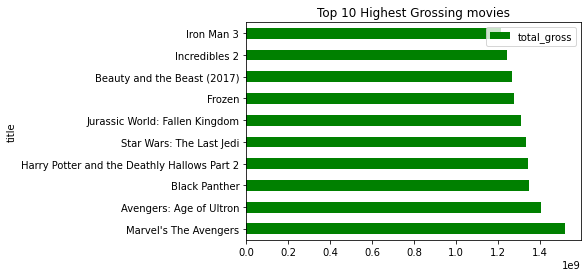

In [145]:
new_sorted_movie_gross_df = sorted_movie_gross_df.head(10)

# Plot a bar chart 
new_sorted_movie_gross_df.plot.barh(x='title', y='total_gross', 
             title='Top 10 Highest Grossing movies', color='green') 

## Data Evaluation

From the analysis, we got a list of the top 10 highest grossing movies. Most of them are franchises which
are based on previous comic books

My reccommenations;

1) In conjuction with the marketing and research department, I recommend deeper analysis to be done on this 10 movie
ao that the studio may find out how it can also create and market high grossing film. Already from the list we can
see a common trend in that most of the movies are from movie franchises.

### SUMMATION
In summary here are my recommendations.

1) The studio should work with the industry average and avoid creating whose runtime go beyond 108.22 minutes.

2) The studio should focus on movies that are in the genre of drama only or have drama as one of their genres,
that is if their target is to get the highest rating of 9 and above. The other genre that is of interest is comedy.

3)  In conjuction with the marketing and research department, I recommend deeper analysis to be done on this 10 movie
so that the studio may find out how it can also create and market high grossing film. Already from the list we can see 
a common trend in that most of the movies are from movie franchises.
